In [19]:
# In this tutorial we will interpolate between points provided in a thermistor
# calibration file and then use the interpolated data to convert a set of
# resistance measurements in ohms to temperature in celsius.
import numpy as np 
import matplotlib.pyplot as plt

(array([ 2069.,  2402.,  2799.,  3273.,  3843.,  4529.,  5359.,  6367.,
         7599.,  9109., 10970., 13280., 16150., 19740., 24270., 30000.,
        37300., 46670.]),
 array([100.,  95.,  90.,  85.,  80.,  75.,  70.,  65.,  60.,  55.,  50.,
         45.,  40.,  35.,  30.,  25.,  20.,  15.]))

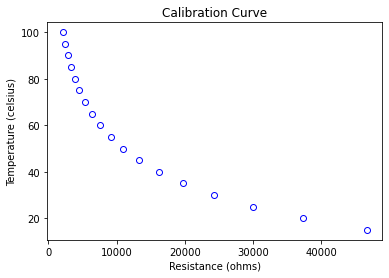

In [20]:
# The first step is to import the calibration data and the experimentally
# measured resistance readings.

# Here's the calibration data
calData = np.loadtxt('thermister calibration data.dat')
Rcal = calData[:, 0]
Tcal = calData[:, 1]
plt.plot(Rcal, Tcal, 'bo', fillstyle = 'none')
plt.xlabel('Resistance (ohms)')
plt.ylabel('Temperature (celsius)')
plt.title('Calibration Curve')
Rcal, Tcal

In [21]:
# To do the interpolation, we will use the Python module 'SciPy' and the 
# function 'interp1d()'.

# To use interp1, you first must supply the x calibration data (Rcal) and the y
# calibration data (Tcal).  
from scipy.interpolate import interp1d 
f_lin_interp = interp1d(Rcal, Tcal);

In [22]:
#'interp1d()' creates a function, which we called 'f_lin_interp' that we can 
# now evaluate at any x (in our case resistance) value that is within the 
# interpolation range.  The interpolation range will be the values of resistance
# that fall between the min and max values in Rcal.
f_lin_interp(28e3)

array(26.7452007)

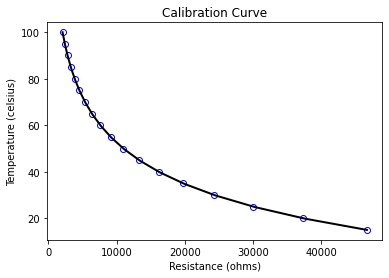

In [23]:
# We can use this function to plot a continuouse calibration curve.

# Show the calibration data...
plt.plot(Rcal, Tcal, 'bo', fillstyle = 'none')
plt.xlabel('Resistance (ohms)')
plt.ylabel('Temperature (celsius)')
plt.title('Calibration Curve')

# and the interpolation.
xx = np.linspace(min(Rcal), max(Rcal), 5000)
plt.plot(xx, f_lin_interp(xx), 'k-', linewidth = 2);

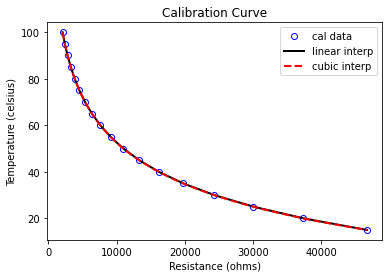

In [24]:
# The interpolation that we just did simply connects the space between the 
# points with straight lines.  If we want to have the points joined by a smooth
# curve we can add the option 'kind = 'cubic'' to 'interp1d()'.  This time, I
# will also add the option 'fill_value = 'extrapolate'' which will allow
# use to estimate values of T outside of the interpolation range.

# Show the calibration data...
plt.plot(Rcal, Tcal, 'bo', fillstyle = 'none')
plt.xlabel('Resistance (ohms)')
plt.ylabel('Temperature (celsius)')
plt.title('Calibration Curve')

# and the first interpolation...
xx = np.linspace(min(Rcal), max(Rcal), 5000)
plt.plot(xx, f_lin_interp(xx), 'k-', linewidth = 2);

# and the second interpolation.
f_cubic_interp = interp1d(Rcal, Tcal, kind = 'cubic', fill_value = 'extrapolate')
plt.plot(xx, f_cubic_interp(xx), 'r--', linewidth = 2)
plt.legend(('cal data', 'linear interp', 'cubic interp'));

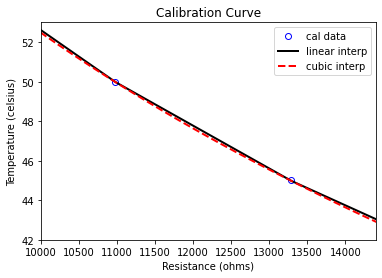

In [25]:
# We'll show these curve together a second time while zoomed into a 
# narrow range of R values.  This will highlight the difference between the 
# linear and cuboc interpolations.

# Show the calibration data...
plt.plot(Rcal, Tcal, 'bo', fillstyle = 'none')
plt.xlabel('Resistance (ohms)')
plt.ylabel('Temperature (celsius)')
plt.title('Calibration Curve')

# and the first interpolation...
xx = np.linspace(min(Rcal), max(Rcal), 5000)
plt.plot(xx, f_lin_interp(xx), 'k-', linewidth = 2);

# and the second interpolation.
f_cubic_interp = interp1d(Rcal, Tcal, kind = 'cubic', fill_value = 'extrapolate')
plt.plot(xx, f_cubic_interp(xx), 'r--', linewidth = 2)
plt.legend(('cal data', 'linear interp', 'cubic interp'))
plt.axis((10000,  14400, 42, 53));

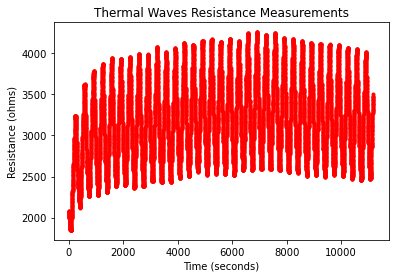

In [27]:
# Here are the measured resistances from a PHYS 232 thermal waves experiment.
# The first column of data in the file is time in seconds.
expData = np.loadtxt('thermalWaves-12092010-00-x05cm f003Hz V80V.dat')
time = expData[:, 0]
Rexp = expData[:, 1]
plt.plot(time, Rexp, 'r.')
plt.ylabel('Resistance (ohms)')
plt.xlabel('Time (seconds)')
plt.title('Thermal Waves Resistance Measurements');

Text(0.5, 1.0, 'Thermal Waves Interpolated Temperature Measurements')

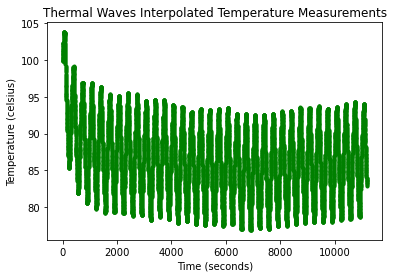

In [28]:
# Here's a plot of the data after using cubic interpolation function
# to convert the resistance measurements to temperatures.
plt.plot(time, f_cubic_interp(Rexp), 'g.')
plt.ylabel('Temperature (celsius)')
plt.xlabel('Time (seconds)')
plt.title('Thermal Waves Interpolated Temperature Measurements')